### 1. Read in the Sacramento housing data set.

The file is stored in the `datasets` subfolder.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy.stats
from sklearn import metrics

In [2]:

df=pd.read_csv('./datasets/sacramento_real_estate_transactions.csv')

In [3]:
df.head(2)

,street,city,zip,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     810 non-null    object 
 1   city       810 non-null    object 
 2   zip        810 non-null    int64  
 3   beds       810 non-null    int64  
 4   baths      810 non-null    int64  
 5   sq__ft     810 non-null    int64  
 6   type       810 non-null    object 
 7   sale_date  810 non-null    object 
 8   price      810 non-null    int64  
 9   latitude   810 non-null    float64
 10  longitude  810 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 69.7+ KB


In [5]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,95761.335802,3.249383,1.960494,1587.980247,230174.171605,38.577190,-121.378853
std,85.408903,0.846446,0.665906,647.362230,119549.115986,0.126505,0.119629
min,95603.000000,1.000000,1.000000,484.000000,30000.000000,38.241514,-121.550527
25%,95670.000000,3.000000,2.000000,1144.500000,149148.250000,38.473785,-121.451501
50%,95820.000000,3.000000,2.000000,1418.500000,208000.000000,38.592102,-121.406119
75%,95828.000000,4.000000,2.000000,1851.000000,285000.000000,38.675345,-121.325844
max,95864.000000,8.000000,5.000000,4400.000000,884790.000000,39.008159,-120.597599


### 2. Conduct exploratory data analysis on this data set. 

If you discover any issues with the data, fix them to the best of your ability. Report any notable findings.

_**Note:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel._

In [6]:
#min beds and bath=0 and sq__ft=0
#neg sq_ft
#neg price


In [7]:
df['beds'].value_counts()

3    391
4    234
2    125
5     49
1      8
6      2
8      1
Name: beds, dtype: int64

In [8]:
unwanted_df=df[(df['beds'] == 0) |  (df['baths'] == 0) | (df['sq__ft'] == 0)]
    

unwanted_df

,street,city,zip,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


In [9]:
unwanted_df.index


Int64Index([], dtype='int64')

In [10]:
df.index

RangeIndex(start=0, stop=810, step=1)

In [11]:
df.drop(index=unwanted_df.index, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     810 non-null    object 
 1   city       810 non-null    object 
 2   zip        810 non-null    int64  
 3   beds       810 non-null    int64  
 4   baths      810 non-null    int64  
 5   sq__ft     810 non-null    int64  
 6   type       810 non-null    object 
 7   sale_date  810 non-null    object 
 8   price      810 non-null    int64  
 9   latitude   810 non-null    float64
 10  longitude  810 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 69.7+ KB


In [13]:
#neg sq__ft


df[df['sq__ft'] < 0]

,street,city,zip,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


In [14]:
df.drop(index=703,inplace=True)

In [15]:
#neg price

df[df['price'] < 0]

,street,city,zip,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


In [16]:
df['zip'].value_counts()

95823    60
95828    44
95758    42
95838    36
95757    34
         ..
95663     1
95655     1
95682     1
95635     1
95691     1
Name: zip, Length: 66, dtype: int64

In [17]:
df['zip'].unique()

array([95838, 95823, 95815, 95824, 95841, 95842, 95820, 95670, 95673,
       95822, 95621, 95833, 95660, 95834, 95843, 95832, 95827, 95828,
       95758, 95626, 95825, 95835, 95624, 95632, 95826, 95608, 95662,
       95630, 95829, 95655, 95757, 95726, 95818, 95742, 95683, 95693,
       95831, 95814, 95635, 95864, 95817, 95628, 95667, 95610, 95722,
       95816, 95678, 95747, 95648, 95819, 95811, 95682, 95765, 95661,
       95650, 95821, 95603, 95762, 95677, 95623, 95663, 95746, 95619,
       95614, 95690, 95691])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 809 entries, 0 to 809
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     809 non-null    object 
 1   city       809 non-null    object 
 2   zip        809 non-null    int64  
 3   beds       809 non-null    int64  
 4   baths      809 non-null    int64  
 5   sq__ft     809 non-null    int64  
 6   type       809 non-null    object 
 7   sale_date  809 non-null    object 
 8   price      809 non-null    int64  
 9   latitude   809 non-null    float64
 10  longitude  809 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 75.8+ KB


In [20]:
#we can drop this column since all state is CA
df.drop('state',axis=1,inplace=True)

In [21]:
df['type'].unique()

array(['Residential', 'Condo', 'Multi-Family'], dtype=object)

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work. Use the pandas `to_csv` method to export your cleaned dataset.

```python
# example -- your dataframe name may be different
dataframe.to_csv('./datasets/sacramento_cleaned_dataframe.csv', index=False)

```

In [22]:
df.to_csv('./datasets/sacramento_real_estate_transactions.csv',index=False)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model.

For each of the variables you believe should be considered, generate a plot showing the relationship between the independent and dependent variables.

In [23]:
df.head(2)

,street,city,zip,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028


In [24]:
#y=predict price
#x= variables city,beds,baths,sq_ft,type

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city', ylabel='price'>

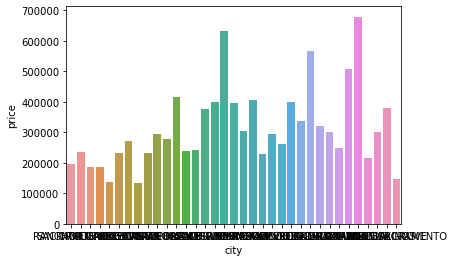

In [25]:
sns.barplot(df['city'],df['price'],ci=None)

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='beds', ylabel='price'>

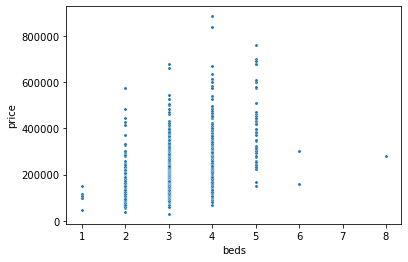

In [26]:
sns.scatterplot(df['beds'],df['price'],s=10)

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='baths', ylabel='price'>

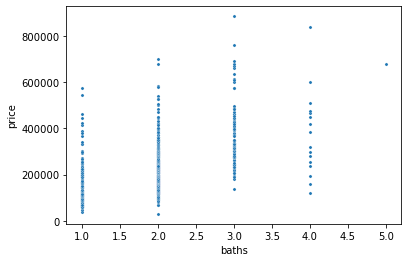

In [27]:
sns.scatterplot(df['baths'],df['price'],s=10)

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sq__ft', ylabel='price'>

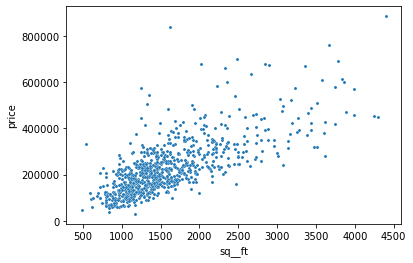

In [28]:
sns.scatterplot(df['sq__ft'],df['price'],s=10)

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='price'>

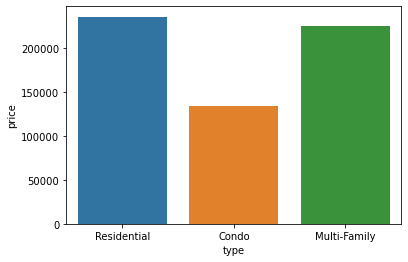

In [29]:

sns.barplot(df['type'],df['price'],ci=None)

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

sq__ft will be the best predictor of y in an SLR model since  scatterplot is slightly positively correlated.

### 5. Write a function that will take in two lists, `x` and `y`, and return the intercept and slope coefficients that minimize SSE. 

`y` is the target variable, and `x` is the predictor variable.

**Don't use scikit-learn for this**. Instead, use numpy and scipy.

The slope and intercept of simple linear regression can be calculated by using certain summary statistics. In particular, we'll need to know:

- $\bar{x}$, the mean of `x`
- $\bar{y}$, the mean of `y`
- $s_{x}$, the standard deviation of `x`
- $s_{y}$, the standard deviation of `y`
- $r_{xy}$, the correlation of `x` and `y`

Given these summary statistics, the **coefficient on `X`** (or the slope) can be given by $\beta_{1} = r_{xy} * \frac{s_{y}}{s_{x}}$. The **intercept of the model** can be given by $\beta_{0} = \bar{y} - \beta_{1}\bar{x}$.

Your function should take in `x` and `y`, then use the above summary statistics to calculate the slope and intercept.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [27]:
def sse(x,y):
    x_mean=np.mean(x)
    y_mean=np.mean(y)
    x_std=np.std(x)
    y_std=np.std(y)
    r=scipy.stats.pearsonr(x,y)[0]
    b1=r * (y_std/x_std)
    b0=y_mean-(b1 * x_mean)
    return b1,b0
                

In [29]:
x=df['sq__ft']

In [30]:
y=df['price']

In [31]:
sse(x,y)

(134.45000196726627, 16761.01343794752)

intercept b0=16761   ******            coeffient b1 =134

### 6. Interpret the intercept and the slope.

In [32]:
X=df[['sq__ft']]
y=df['price']
lr=LinearRegression()
lr.fit(X,y)
print(f'Model intercept: {lr.intercept_}')
print(f'Model coefficient: {lr.coef_[0]}')
print(X.shape)
print(y.shape)

#checking values w/r

Model intercept: 16761.013437947287
Model coefficient: 134.45000196726642
(809, 1)
(809,)


here,bo(y) intercept is 16761.ie,base price is 16761 even if  sq__ft is zero.


slope will be b1 which is equal to 134.for every i unit increse in sq__ft,price will increse by 134.

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

we can predict the price from y=mx + c concept since we already know the slope and intercept.
since  b0 and b1 is positive,we can conclude linear relation(positive correlated) between price and sq__ft.

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [33]:
y_predict = lr.predict(X)


In [34]:
resids = y-y_predict

In [35]:
resids

0      -69939.215083
1     -105452.165734
2      -54903.215004
3      -62005.415114
4      -42017.665006
           ...      
805    -90882.017923
806     18656.333656
807     54747.784170
808     -8008.266753
809     35856.083883
Name: price, Length: 809, dtype: float64

(array([ 1.,  2.,  0.,  3.,  4.,  8., 16., 26., 58., 74., 90., 68., 90.,
        71., 63., 56., 36., 32., 33., 13., 19.,  6.,  8.,  7.,  2.,  3.,
         2.,  1.,  3.,  5.,  2.,  0.,  1.,  1.,  2.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-219994.42054371, -203516.6884655 , -187038.95638728,
        -170561.22430906, -154083.49223084, -137605.76015262,
        -121128.0280744 , -104650.29599618,  -88172.56391797,
         -71694.83183975,  -55217.09976153,  -38739.36768331,
         -22261.63560509,   -5783.90352687,   10693.82855135,
          27171.56062956,   43649.29270778,   60127.024786  ,
          76604.75686422,   93082.48894244,  109560.22102066,
         126037.95309888,  142515.68517709,  158993.41725531,
         175471.14933353,  191948.88141175,  208426.61348997,
         224904.34556819,  241382.0776464 ,  257859.80972462,
         274337.54180284,  290815.27388106,  307293.00595928,
         323770.7380375 ,  340248.

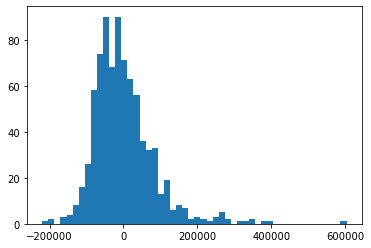

In [36]:
plt.hist(resids,bins=50)

---

## Dummy Variables

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.



#### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tuesday, Wednesday, Thursday, Friday or Saturday, it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted as the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to*, is often referred to as the **reference category**.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

In [37]:
df['type'].unique()

array(['Residential', 'Condo', 'Multi-Family'], dtype=object)

In [38]:
df=pd.get_dummies(columns = ['type'],data=df,drop_first=True)

In [39]:
df.head(2)

,street,city,zip,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Multi-Family,type_Residential
0,3526 HIGH ST,SACRAMENTO,95838,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,1
1,51 OMAHA CT,SACRAMENTO,95823,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,1


10. Check the dummy columns you've created. Do they all make sense?
Use .head() on the new dataframe you've created. Depending on how you cleaned
the data earlier in this notebook, there may be a dummy column that needs to be 
removed. Check that all the columns you've created make sense, and if any of the 
columns seem to be errors, 
drop them. If there don't appear to be any errors, then move on to the next step!

In [40]:
df.columns

Index(['street', 'city', 'zip', 'beds', 'baths', 'sq__ft', 'sale_date',
       'price', 'latitude', 'longitude', 'type_Multi-Family',
       'type_Residential'],
      dtype='object')

already droped state since it has all same value

### 11. Build what you think may be the best MLR model predicting `price`. 

Choose at least three variables, and build a model that uses them to predict price. At least one of the variables you choose should be a dummy-coded variable. (This can be one we created before or a new one.) 

You may need to load in the scikit-learn API:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

In [53]:
df.head(2)

,street,city,zip,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Multi-Family,type_Residential
0,3526 HIGH ST,SACRAMENTO,95838,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,1
1,51 OMAHA CT,SACRAMENTO,95823,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,1


In [41]:
X=df[['sq__ft','beds','type_Residential']]

In [42]:
X

,sq__ft,beds,type_Residential
0,836,2,1
1,1167,3,1
2,796,2,1
3,852,2,1
4,797,2,1
...,...,...,...
805,2280,4,1
806,1477,3,1
807,1216,3,1
808,1685,4,1


In [43]:
y=df['price']

In [44]:
X.shape

(809, 3)

In [45]:
y.shape

(809,)

In [46]:
model = LinearRegression()

In [47]:
model.fit(X,y)

LinearRegression()

In [48]:
model.score(X,y)

0.5501626764575489

In [50]:
print(f'Model intercept: {model.intercept_}')
print(f'Model coefficient: {model.coef_}')

Model intercept: 27316.98362262029
Model coefficient: [   156.24217243 -25639.89265963  40848.86694574]


In [51]:
list(zip(model.coef_,X.columns))

[(156.24217242820094, 'sq__ft'),
 (-25639.89265962701, 'beds'),
 (40848.86694573925, 'type_Residential')]

In [52]:
y_pred = model.predict(X)
y_pred[1:10]

array([173580.78781319, 141254.83450195, 150004.39615793, 141411.07667438,
       125701.02310818, 163737.53095021, 175143.20953747, 123061.0825583 ,
       170299.7021922 ])

12. Plot the true price vs the predicted price to evaluate your MLR visually.
You can use matplotlib or seaborn.

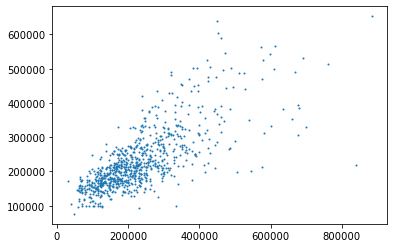

In [33]:
plt.scatter(y,y_pred,s=1)

In [37]:
residuals=y-y_pred

(array([  8.,  25.,  98., 203., 197., 129.,  69.,  40.,  16.,   7.,   8.,
          4.,   2.,   4.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-187933.77327999, -147560.04317631, -107186.31307264,
         -66812.58296896,  -26438.85286529,   13934.87723839,
          54308.60734206,   94682.33744574,  135056.06754941,
         175429.79765308,  215803.52775676,  256177.25786043,
         296550.98796411,  336924.71806778,  377298.44817146,
         417672.17827513,  458045.90837881,  498419.63848248,
         538793.36858616,  579167.09868983,  619540.8287935 ]),
 <BarContainer object of 20 artists>)

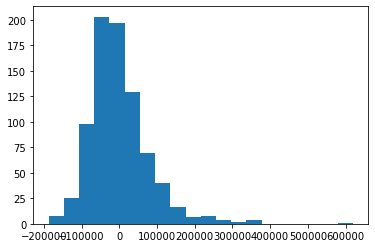

In [38]:
plt.hist(residuals,bins=20)

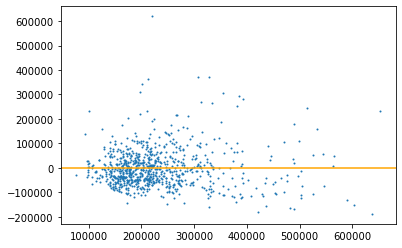

In [39]:
plt.scatter(y_pred, residuals, s = 1)
plt.axhline(0, color = 'orange');

13. List the five assumptions for an MLR model.
Indicate which ones are the same as the assumptions for an SLR model.


**for MLR**
>1.linearity-linear realtion between x and y should be line.

>2.independence-observation shouldn't effect one another.

>.Normality-residuals should be normally distributed.

>.equal Variance-absolute randomness in our plot.

>.no multicolinearity-no corelation among the predictor variable.


**for SLR**
>1.linearity-linear realtion between x and y should be line.

>2.independence-observation shouldn't effect one another.

>3.Normality-residuals should be normally distributed.

>4.equal Variance-absolute randomness in our plot.


### 14. Pick at least two assumptions and explain whether or not you believe them to be met for your model, and explain why.

1.linearity-linear realtion between x and y should be line.

we got a scatter plot slightly correlated.so it met line assumption.


2.residuals plot is not normally distibuted,it didn't met line assumption.

3.error variance are not randomly distributed,it didn't met line assumption.

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [53]:
import statsmodels.api as sm
X=df[['sq__ft','beds','type_Residential']]
X=sm.add_constant(X)
y=df['price']
ols=sm.OLS(y,X).fit()

In [54]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     328.2
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          3.81e-139
Time:                        17:47:02   Log-Likelihood:                -10282.
No. Observations:                 809   AIC:                         2.057e+04
Df Residuals:                     805   BIC:                         2.059e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.732e+04   1.41e+04      1.933      0.054    -416.280    5.51e+04
sq__ft             156.2422      6.249     25.003      0.000     143.976     168.508
beds             -2.564e+04   4847.793     -5.289      0.000   -3.52e+04   -1.61e+04
type_Residential  4.085e+04   1.17e+04      3.497      0.000    1.79e+04    6.38e+04
==============================================================================
Omnibus:                      321.642   Durbin-Watson:                   1.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1943.962
Skew:                           1.690   Prob(JB):                         0.00
Kurtosis:                       9.801   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [55]:
def r2_adj(y,n,p):
    null_prediction = y.mean()
    null_residuals = y-null_prediction
    null_ss = sum(null_residuals**2)
    r2=1 - rss / null_ss
    r2_adj=1-(((1-r2)(n-1))/(n-p-1))
    return r2_adj
        

### 17. Metrics, metrics, everywhere...

Calculate and interpret at least three regression metrics. How well does your model perform?

In [56]:
metrics.mean_squared_error(y,y_pred)

6413137524.8823

In [57]:
metrics.mean_absolute_error(y,y_pred)

57518.63931531917

In [58]:
metrics.mean_squared_error(y,y_pred,squared=False)

80082.06743636368

In [59]:
metrics.r2_score(y,y_pred)

0.5501626764575489

### 18. Model Iteration

Adjust your model by adding or removing a variable. Then calculate the same regression metrics as you used in question 17. Has your model performance increased or decreased?

In [60]:
X=df[['sq__ft','beds','baths']]
y=df['price']

In [61]:
X.shape

(809, 3)

In [62]:
X.head()

,sq__ft,beds,baths
0,836,2,1
1,1167,3,1
2,796,2,1
3,852,2,1
4,797,2,1


In [63]:
y.shape

(809,)

In [64]:
y.head()

0    59222
1    68212
2    68880
3    69307
4    81900
Name: price, dtype: int64

In [65]:
lr=LinearRegression()

In [66]:
lr.fit(X,y)

LinearRegression()

In [67]:
y_pred = model.predict(X)

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- baths
Feature names seen at fit time, yet now missing:
- type_Residential

  warnings.warn(message, FutureWarning)


In [68]:
y_pred[:10]

array([147504.52139908, 173580.78781319, 141254.83450195, 150004.39615793,
       141411.07667438, 166549.89005392, 204586.39789595, 175143.20953747,
       204758.81644978, 211148.56913794])

In [69]:
r2=lr.score(X,y_pred)

In [70]:
r2

0.7930516372595786

In [71]:
metrics.mean_squared_error(y,y_pred)

8882892780.050043

In [72]:
metrics.mean_absolute_error(y,y_pred)

74922.4418433865

In [73]:
metrics.mean_squared_error(y,y_pred,squared=False)

94249.09962461203

incresed since r2 value increase

### 19. Bias vs. Variance

_(To be completed after the bias-variance tradeoff lecture.)_ At this point, do you think your model is high bias, high variance or in the sweet spot?

I think this model is high bias,and low variance since the dataset is underfit.